In [1]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=54c6f7382276926629ae75f4e6f3603a0b524eac73c752eb1de1034706368b22
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


#def take_photo(filename='photo2.jpg', quality=0.8):
def take_photo(filename, quality):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to 1.jpg


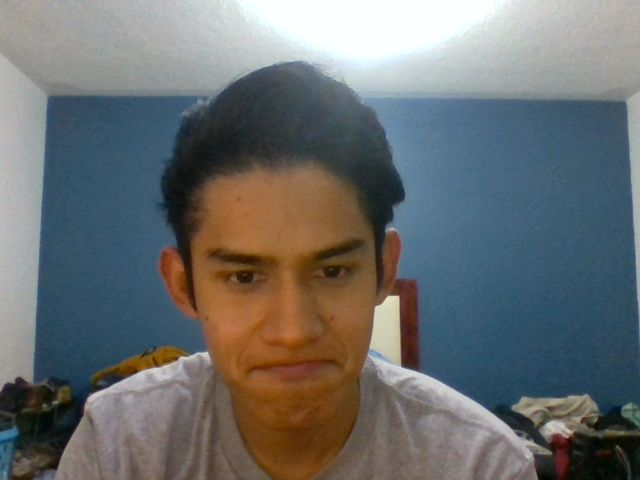

<IPython.core.display.Javascript object>

Saved to 2.jpg


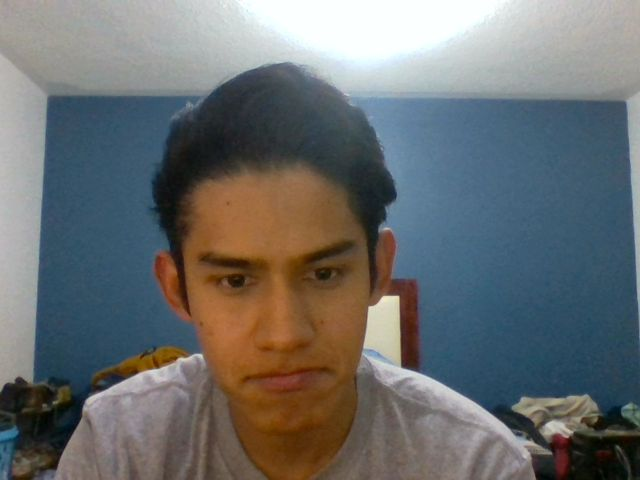

<IPython.core.display.Javascript object>

Saved to 3.jpg


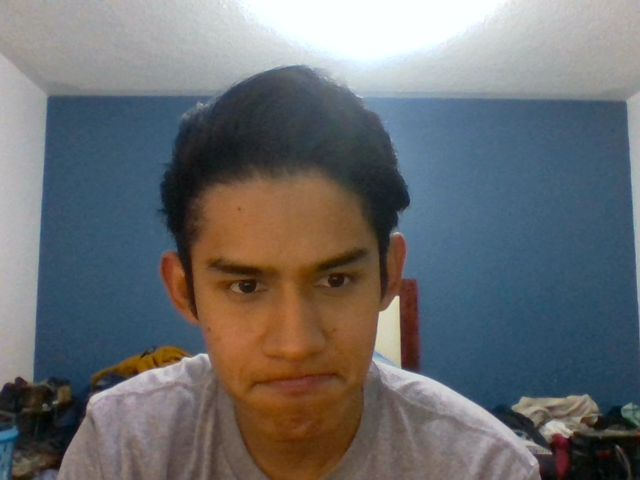

<IPython.core.display.Javascript object>

Saved to 4.jpg


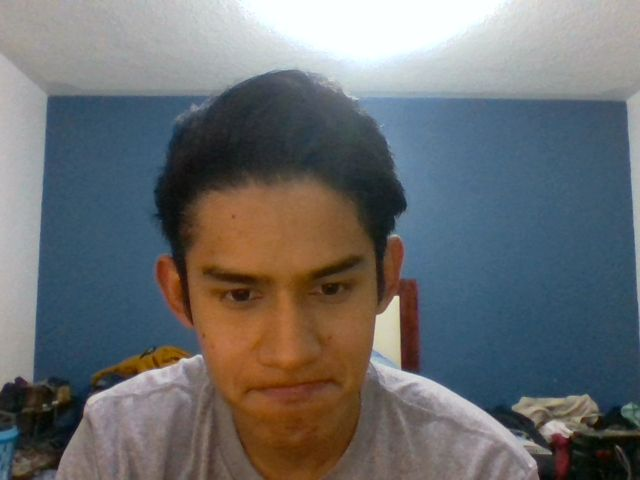

<IPython.core.display.Javascript object>

Saved to 5.jpg


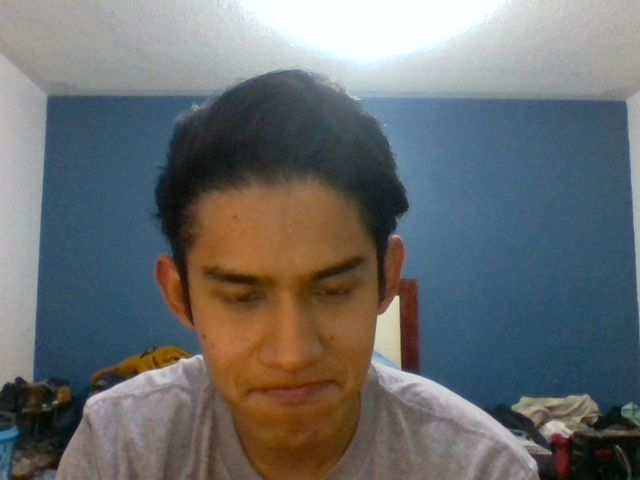

<IPython.core.display.Javascript object>

Saved to 6.jpg


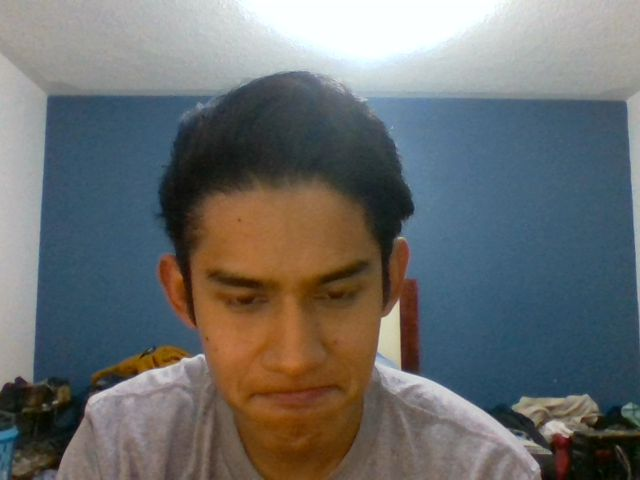

<IPython.core.display.Javascript object>

Saved to 7.jpg


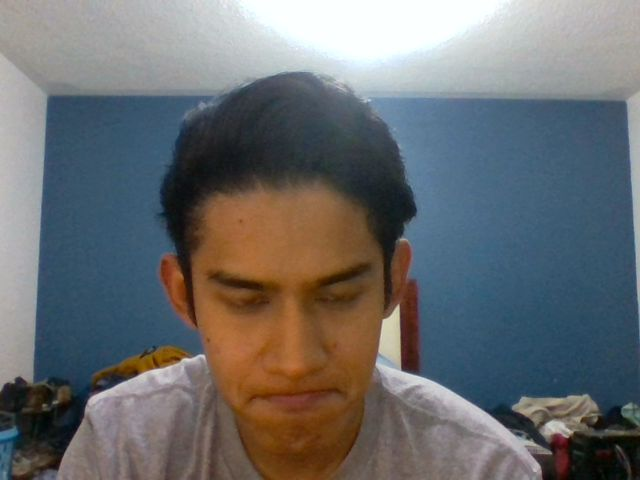

<IPython.core.display.Javascript object>

Saved to 8.jpg


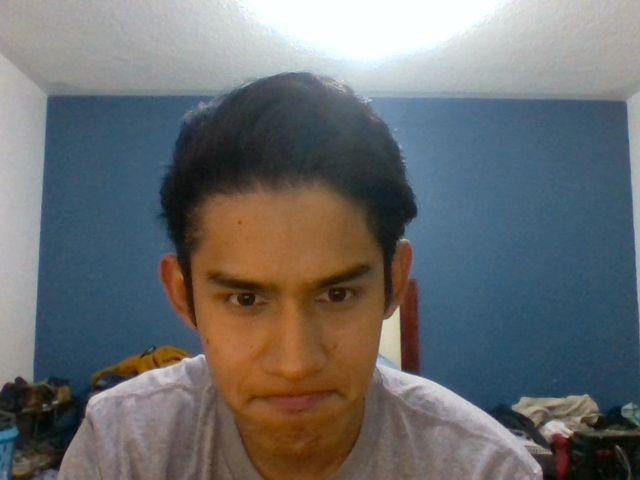

<IPython.core.display.Javascript object>

Saved to 9.jpg


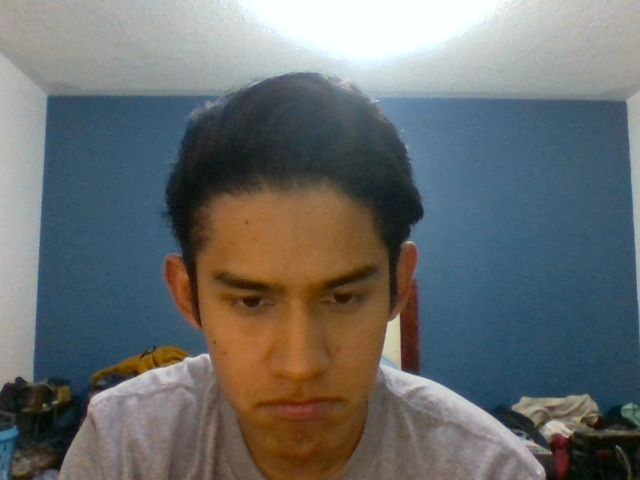

<IPython.core.display.Javascript object>

Saved to 10.jpg


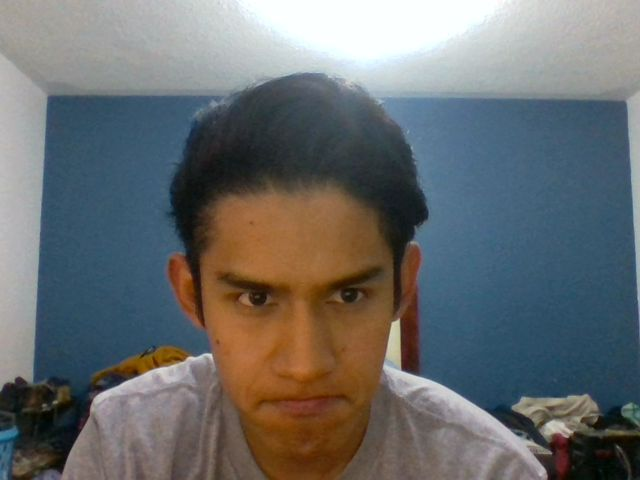

In [12]:
from IPython.display import Image
i = 0
for x in range(10):
  i += 1
  try:
    filename = take_photo(f'{i}.jpg',0.8)
    print('Saved to {}'.format(filename))
      
    # Show the image which was just taken.
    display(Image(filename))

  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

In [0]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow

In [0]:
tolerance = 0.4
frame_thickness = 3
font_thickness = 2
model = 'cnn'

In [0]:
faces_known = []
faces_names = []

In [5]:
for name in os.listdir('faces_model2'):
  for filename in ps.listdir(f'faces_model2/{name}'):
    #photo = face_recognition.load_image_file(f'faces_model2/{name}/{filename}')
    #encoding = face_recognition.face_encodings(photo)[0]
    #faces_known.appen(encoding)
    #faces_names.append(name)
    image = cv2.imread(filename)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

SyntaxError: ignored

In [5]:
video_capture = cv2.VideoCapture(0)
while True:
  ret, frame = video_capture.read()
  rgb_frame = frame[:, :, ::-1]
  face_locations = face_recognition.face_locations(rgb_frame)
  face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(faces_known , face_encoding)

        name = "Unknown"

        # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = faces_names[best_match_index]

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

IndentationError: ignored